## Iris Flower Classification Model ##

In [1]:
#importing all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
iris = pd.read_csv('IRIS.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Cleaning the Data

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
iris.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


## Visualisation of data

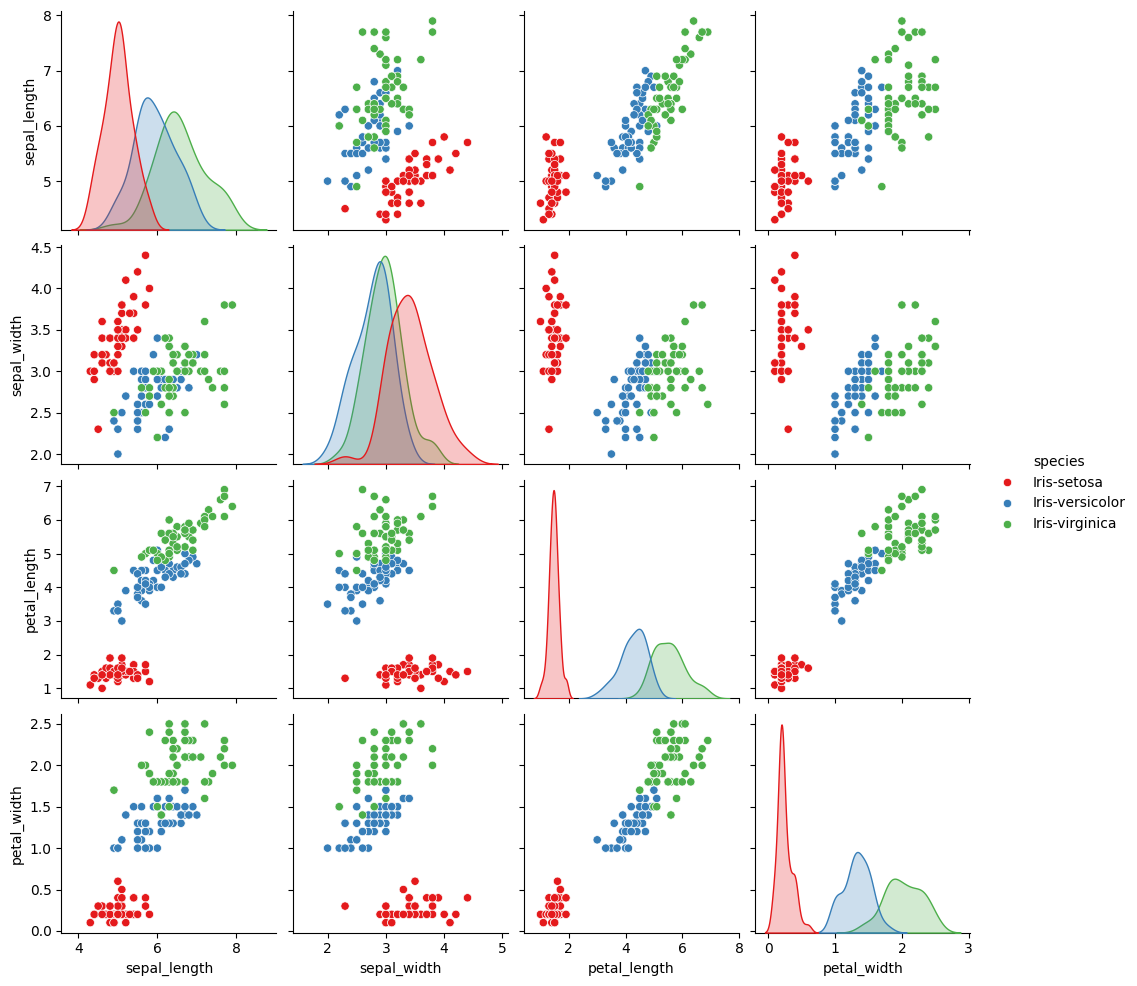

In [9]:
# Pairplot to visualize relationships between features colored by species
sns.pairplot(iris, hue='species', palette='Set1')
plt.show()

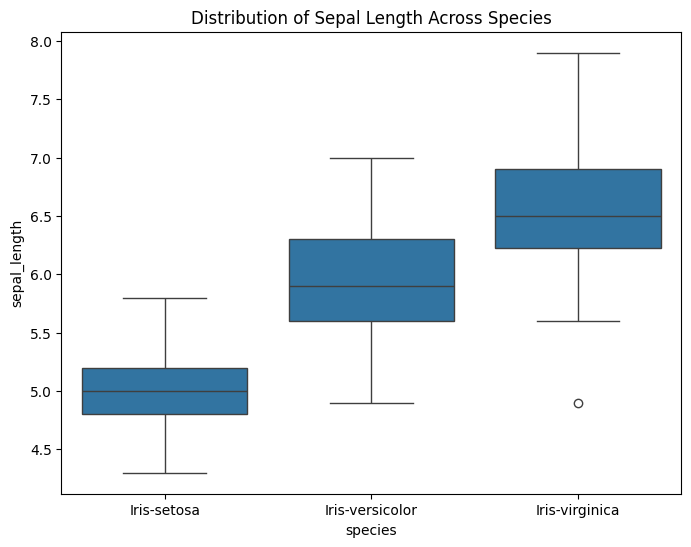

In [10]:
# Boxplot for sepal length grouped by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.title('Distribution of Sepal Length Across Species')
plt.show()

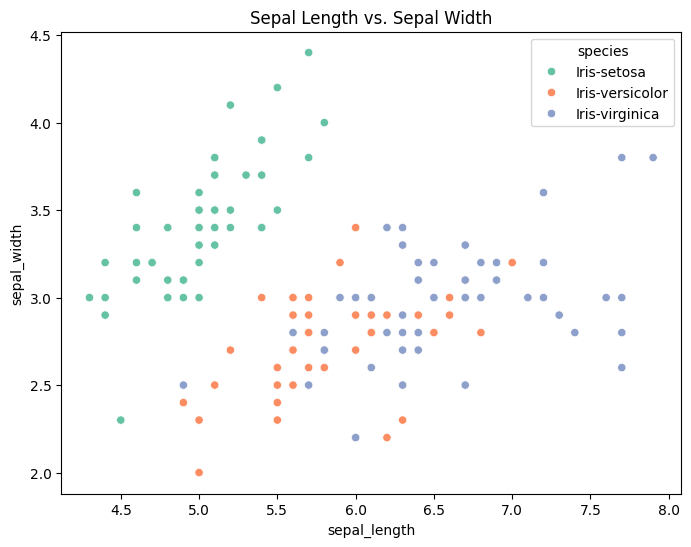

In [11]:
# Scatter plot of sepal length vs. sepal width colored by species
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris, palette='Set2')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

## Train the model

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Split the data into features (X) and target (y)
X = iris.drop('species', axis=1)

In [14]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
y = iris['species']

In [16]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

In [20]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [22]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

## Evaluating the model

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

In [25]:
accuracy

1.0

In [26]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [27]:
from sklearn.metrics import f1_score

In [28]:
# Calculate the F1 score of the model
f1 = f1_score(y_test, y_pred, average='weighted')

In [29]:
print(f"F1 Score: {f1:.2f}")

F1 Score: 1.00


## Conclusion: ##
__From above model, we can conclude that if the model achieves a high accuracy or F1 score (close to 1), it indicates that the model has successfully learned to classify Iris flowers based on their sepal and petal measurements.__ 